In [47]:
import numpy as np
import pandas as pd

In [48]:
df = pd.read_csv('spam.csv')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
440,ham,Yes..he is really great..bhaji told kallis bes...,NaN,NaN,NaN
3601,ham,Cps is causing the outages to conserve energy.,NaN,NaN,NaN
1271,ham,If you still havent collected the dough pls le...,NaN,NaN,NaN
4620,ham,"Received, understood n acted upon!",NaN,NaN,NaN
5516,ham,"Ya, i'm referin to mei's ex wat... No ah, wait...",NaN,NaN,NaN


In [49]:
df.shape

(5572, 5)

# Step 1: Data Cleaning

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [51]:
# dropping NaN columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [52]:
df.sample(4)

,v1,v2
2459,ham,Nope. Meanwhile she talk say make i greet you.
231,ham,Dear we are going to our rubber place
3125,ham,U coming 2 pick me?
3321,ham,Ok darlin i supose it was ok i just worry too ...


In [53]:
# renmaing v1 and v2
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
2400,ham,Hi! This is Roger from CL. How are you?
4807,ham,What's up my own oga. Left my phone at home an...
2180,ham,Babe ! How goes that day ? What are you doing ...
2979,ham,What u mean u almost done? Done wif sleeping? ...
3381,ham,"Well, I meant as opposed to my drunken night o..."


In [54]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()
# 0 : Ham, 1 : Spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
# Any missing values?
df.isnull().sum()

target    0
text      0
dtype: int64

In [56]:
# duplicate?
df.duplicated().sum()
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [57]:
df.shape

(5169, 2)

# Step 2: EDA (Exploratory Data Analysis)

In [58]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

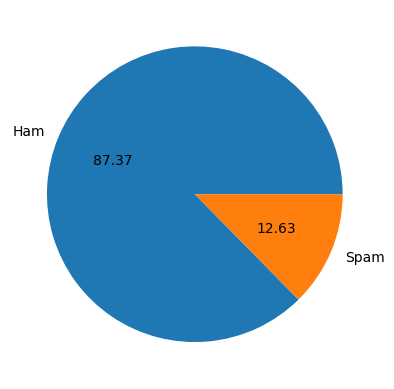

In [59]:
# Visualizing in piechart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Ham', 'Spam'], autopct='%0.2f')
plt.show()

In [60]:
# Data is imbalanced

In [61]:
import nltk
nltk.download('punkt') # ==> downloading some dependencies for Alphabets, Words and Scentences columns (might take some time!)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saadz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
# Characters in message
df['num_characters']= df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [63]:
# number of words
# df['text'].apply(lambda x:nltk.word_tokenize(x)) # ==> breaking the message into words, sort of like split
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # ==> breaking the message into words, sort of like split
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [64]:
# number of Scentences
# df['text'].apply(lambda x:nltk.word_tokenize(x)) # ==> breaking the message into scentences, sort of like split
# df['num_scnetences'] = df['text'].apply(lambda x:nltk.sent_tokenize(x)) # ==> breaking the message into scentences, sort of like split
df['num_scentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # ==> breaking the message into scentences, sort of like split
df.head()

,target,text,num_characters,num_words,num_scentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [65]:
df[['num_words', 'num_characters', 'num_scentences']].describe()

,num_words,num_characters,num_scentences
count,5169.000000,5169.000000,5169.000000
mean,18.456761,78.924163,1.966531
std,13.325633,58.175349,1.449833
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,60.000000,1.000000
75%,26.000000,117.000000,2.000000
max,220.000000,910.000000,38.000000


In [66]:
# Ham messages description
df[df['target'] == 0][['num_words', 'num_characters', 'num_scentences']].describe()

,num_words,num_characters,num_scentences
count,4516.000000,4516.000000,4516.000000
mean,17.123782,70.457263,1.820195
std,13.493970,56.357463,1.383657
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,38.000000


In [67]:
# Spam messages description
df[df['target'] == 1][['num_words', 'num_characters', 'num_scentences']].describe()

,num_words,num_characters,num_scentences
count,653.000000,653.000000,653.000000
mean,27.675345,137.479326,2.978560
std,7.011513,30.014336,1.493185
min,2.000000,13.000000,1.000000
25%,25.000000,131.000000,2.000000
50%,29.000000,148.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,223.000000,9.000000


<Axes: xlabel='num_words', ylabel='Count'>

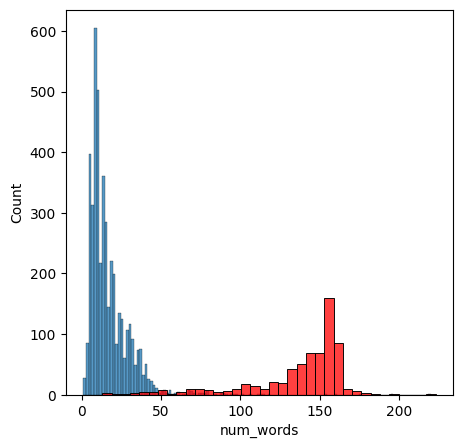

In [68]:
import seaborn as sns
plt.figure(figsize= (5,5))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

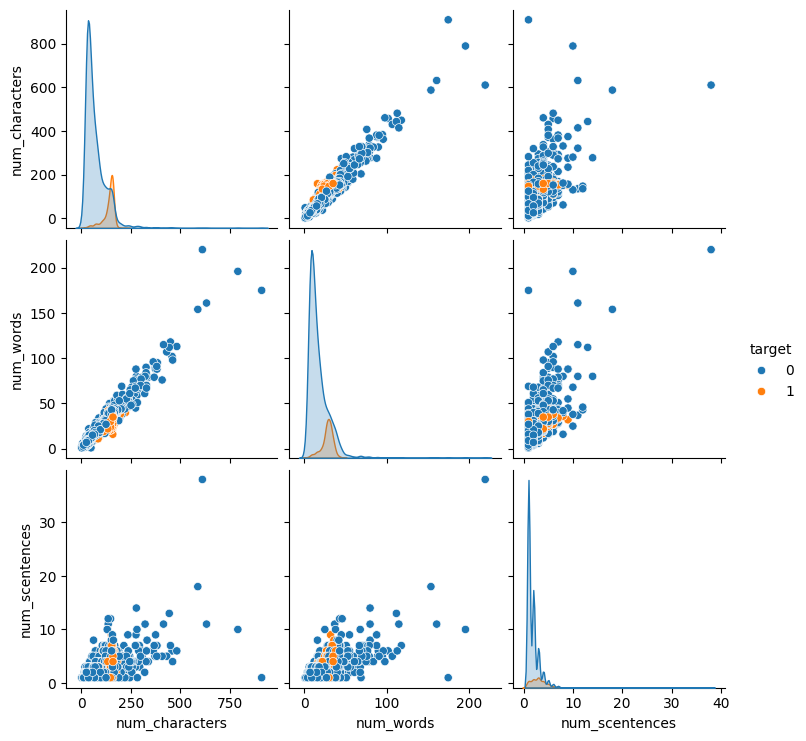

In [69]:
sns.pairplot(df, hue='target')

# Step 3: Data Preprocessing
1: Lowercase 2: Tokenization 3: Removing Special characters 4: Removing stop words and punctuation 5: Stemming

In [70]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
import string
string.punctuation
ps = PorterStemmer()
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saadz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
df['transformed_text'] = df['text'].apply(text_transform)
df.head()

,target,text,num_characters,num_words,num_scentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


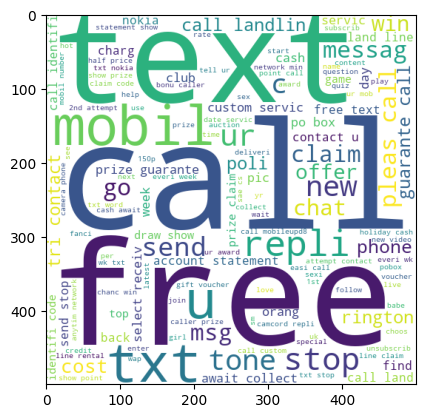

In [72]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=""))
plt.imshow(spam_wc)

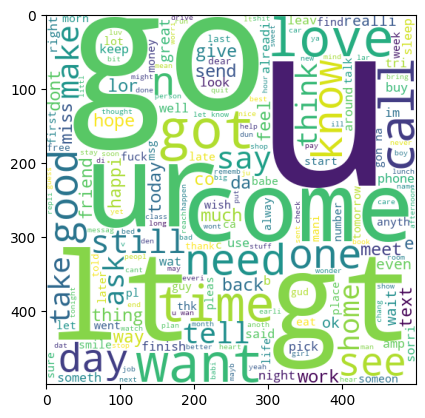

In [73]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=""))
plt.imshow(ham_wc)

In [74]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [75]:
len(spam_corpus)

9941

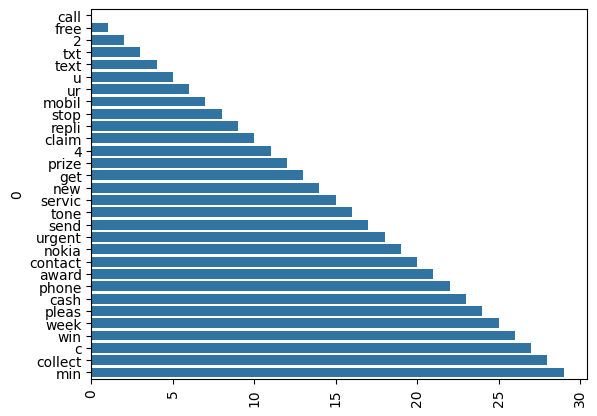

In [76]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation = 'vertical')
plt.show()

In [77]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [78]:
len(ham_corpus)

35305

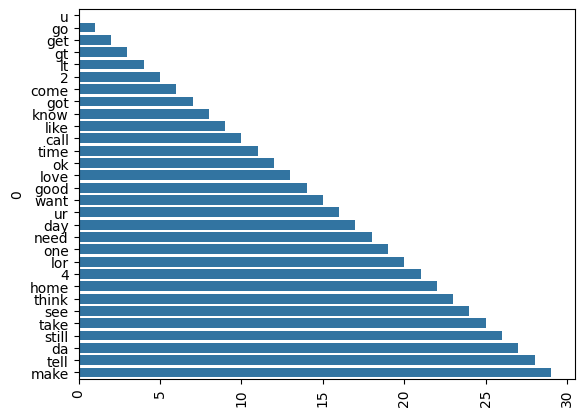

In [79]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation = 'vertical')
plt.show()

# Step 4: Model Building

In [80]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [81]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [82]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=2)

In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
mnb = MultinomialNB()

In [85]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [89]:
input_sms = ("Congrats, you have won $1000. Call on this number to get your prize")
transformed_sms = text_transform(input_sms)
vector_input = tfidf.transform([transformed_sms])
result = mnb.predict(vector_input)[0]

In [90]:
if result == 1:
    print('Spam')
else:
    print('Not Spam')

Spam


tdif ==> mnb(High_precison = 1.0) over CountVectorizer

In [88]:
import pickle
pickle.dump(tfidf, open('vectorized.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))